# MNIST database of handwritten digits. 2nd version of a Keras Neural Network (2 hidden layers with Dropout, but 250 iterations). Graphs for accuracy and loss.

## http://yann.lecun.com/exdb/mnist/

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [0]:
# for reproducibility
np.random.seed(123)

In [0]:
# network and training
NB_EPOCH = 250 # number of iterations increased to 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # Stochastic Gradient Descent optimizer
N_HIDDEN = 128 # number of neurons in each hidden layer
VALIDATION_SPLIT = 0.2 # how much train is reserved fro validation
DROPOUT = 0.3 # Way to prevent overfitting, way of regularization

In [0]:
# data shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train.shape # X_train is 60000 rows of 28x28 values 

(60000, 28, 28)

In [0]:
# X_train to be reshaped in 60000x784
RESHAPED = 784 # number of neurons

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [35]:
# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'training set')
print(X_test.shape[0], 'testing set')

60000 training set
10000 testing set


In [0]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
# Define the Sequential model or linear stack of layers
model = Sequential()

# 1st hidden layer
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

# 2nd hidden layer
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

# Output layer with 10 neurons
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
__________

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=OPTIMIZER, 
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 3s 55us/step - loss: 1.7408 - acc: 0.4499 - val_loss: 0.9299 - val_acc: 0.8175
Epoch 2/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.9368 - acc: 0.7119 - val_loss: 0.5409 - val_acc: 0.8687
Epoch 3/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.7120 - acc: 0.7795 - val_loss: 0.4328 - val_acc: 0.8883
Epoch 4/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.6023 - acc: 0.8165 - val_loss: 0.3787 - val_acc: 0.8980
Epoch 5/250
47744/48000 [============================>.] - ETA: 0s - loss: 0.5400 - acc: 0.8378

48000/48000 [==============================] - 3s 57us/step - loss: 0.5396 - acc: 0.8379 - val_loss: 0.3465 - val_acc: 0.9048
Epoch 6/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.5033 - acc: 0.8501 - val_loss: 0.3218 - val_acc: 0.9107
Epoch 7/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.4685 - acc: 0.8601 - val_loss: 0.3034 - val_acc: 0.9147
Epoch 8/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.4404 - acc: 0.8696 - val_loss: 0.2885 - val_acc: 0.9179
Epoch 9/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.4161 - acc: 0.8777 - val_loss: 0.2747 - val_acc: 0.9212
Epoch 10/250
16000/48000 [=========>....................] - ETA: 1s - loss: 0.4092 - acc: 0.8786

48000/48000 [==============================] - 3s 58us/step - loss: 0.3992 - acc: 0.8818 - val_loss: 0.2652 - val_acc: 0.9234
Epoch 11/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.3808 - acc: 0.8889 - val_loss: 0.2542 - val_acc: 0.9253
Epoch 12/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.3697 - acc: 0.8907 - val_loss: 0.2462 - val_acc: 0.9280
Epoch 13/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.3546 - acc: 0.8956 - val_loss: 0.2386 - val_acc: 0.9294
Epoch 14/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.3466 - acc: 0.8993 - val_loss: 0.2306 - val_acc: 0.9319
Epoch 15/250
16896/48000 [=========>....................] - ETA: 1s - loss: 0.3408 - acc: 0.8980

48000/48000 [==============================] - 3s 59us/step - loss: 0.3331 - acc: 0.9010 - val_loss: 0.2242 - val_acc: 0.9334
Epoch 16/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.3255 - acc: 0.9044 - val_loss: 0.2185 - val_acc: 0.9361
Epoch 17/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.3201 - acc: 0.9083 - val_loss: 0.2126 - val_acc: 0.9382
Epoch 18/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.3086 - acc: 0.9084 - val_loss: 0.2084 - val_acc: 0.9387
Epoch 19/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.3016 - acc: 0.9104 - val_loss: 0.2026 - val_acc: 0.9408
Epoch 20/250
12032/48000 [======>.......................] - ETA: 1s - loss: 0.2932 - acc: 0.9141

48000/48000 [==============================] - 3s 57us/step - loss: 0.2939 - acc: 0.9143 - val_loss: 0.1987 - val_acc: 0.9420
Epoch 21/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.2870 - acc: 0.9154 - val_loss: 0.1949 - val_acc: 0.9432
Epoch 22/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.2785 - acc: 0.9181 - val_loss: 0.1902 - val_acc: 0.9449
Epoch 23/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.2774 - acc: 0.9186 - val_loss: 0.1856 - val_acc: 0.9462
Epoch 24/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.2711 - acc: 0.9204 - val_loss: 0.1822 - val_acc: 0.9473
Epoch 25/250
16128/48000 [=========>....................] - ETA: 1s - loss: 0.2683 - acc: 0.9209

48000/48000 [==============================] - 3s 59us/step - loss: 0.2629 - acc: 0.9229 - val_loss: 0.1786 - val_acc: 0.9473
Epoch 26/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.2598 - acc: 0.9233 - val_loss: 0.1770 - val_acc: 0.9474
Epoch 27/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.2520 - acc: 0.9259 - val_loss: 0.1721 - val_acc: 0.9491
Epoch 28/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.2482 - acc: 0.9264 - val_loss: 0.1693 - val_acc: 0.9500
Epoch 29/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.2438 - acc: 0.9289 - val_loss: 0.1671 - val_acc: 0.9508
Epoch 30/250
13824/48000 [=======>......................] - ETA: 1s - loss: 0.2360 - acc: 0.9311

48000/48000 [==============================] - 3s 54us/step - loss: 0.2402 - acc: 0.9292 - val_loss: 0.1636 - val_acc: 0.9524
Epoch 31/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.2359 - acc: 0.9312 - val_loss: 0.1608 - val_acc: 0.9527
Epoch 32/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.2344 - acc: 0.9310 - val_loss: 0.1593 - val_acc: 0.9534
Epoch 33/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.2283 - acc: 0.9319 - val_loss: 0.1559 - val_acc: 0.9538
Epoch 34/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.2248 - acc: 0.9339 - val_loss: 0.1533 - val_acc: 0.9543
Epoch 35/250
16896/48000 [=========>....................] - ETA: 1s - loss: 0.2179 - acc: 0.9354

48000/48000 [==============================] - 3s 58us/step - loss: 0.2208 - acc: 0.9352 - val_loss: 0.1518 - val_acc: 0.9551
Epoch 36/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.2200 - acc: 0.9355 - val_loss: 0.1498 - val_acc: 0.9560
Epoch 37/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.2160 - acc: 0.9374 - val_loss: 0.1468 - val_acc: 0.9574
Epoch 38/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.2109 - acc: 0.9377 - val_loss: 0.1454 - val_acc: 0.9567
Epoch 39/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.2101 - acc: 0.9376 - val_loss: 0.1436 - val_acc: 0.9572
Epoch 40/250
13312/48000 [=======>......................] - ETA: 1s - loss: 0.2062 - acc: 0.9402

48000/48000 [==============================] - 3s 57us/step - loss: 0.2080 - acc: 0.9393 - val_loss: 0.1416 - val_acc: 0.9580
Epoch 41/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.2017 - acc: 0.9405 - val_loss: 0.1400 - val_acc: 0.9588
Epoch 42/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.2024 - acc: 0.9401 - val_loss: 0.1390 - val_acc: 0.9583
Epoch 43/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1985 - acc: 0.9416 - val_loss: 0.1366 - val_acc: 0.9596
Epoch 44/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1948 - acc: 0.9420 - val_loss: 0.1357 - val_acc: 0.9597
Epoch 45/250
16768/48000 [=========>....................] - ETA: 1s - loss: 0.1903 - acc: 0.9441

48000/48000 [==============================] - 3s 57us/step - loss: 0.1936 - acc: 0.9419 - val_loss: 0.1342 - val_acc: 0.9598
Epoch 46/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1883 - acc: 0.9441 - val_loss: 0.1334 - val_acc: 0.9599
Epoch 47/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1875 - acc: 0.9441 - val_loss: 0.1312 - val_acc: 0.9606
Epoch 48/250
48000/48000 [==============================] - 3s 61us/step - loss: 0.1861 - acc: 0.9451 - val_loss: 0.1303 - val_acc: 0.9604
Epoch 49/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1851 - acc: 0.9447 - val_loss: 0.1291 - val_acc: 0.9607
Epoch 50/250
12160/48000 [======>.......................] - ETA: 1s - loss: 0.1805 - acc: 0.9480

48000/48000 [==============================] - 3s 57us/step - loss: 0.1816 - acc: 0.9463 - val_loss: 0.1279 - val_acc: 0.9612
Epoch 51/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1783 - acc: 0.9480 - val_loss: 0.1261 - val_acc: 0.9619
Epoch 52/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1760 - acc: 0.9470 - val_loss: 0.1250 - val_acc: 0.9624
Epoch 53/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1784 - acc: 0.9467 - val_loss: 0.1239 - val_acc: 0.9625
Epoch 54/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1770 - acc: 0.9473 - val_loss: 0.1227 - val_acc: 0.9641
Epoch 55/250
15872/48000 [========>.....................] - ETA: 1s - loss: 0.1711 - acc: 0.9497

48000/48000 [==============================] - 3s 57us/step - loss: 0.1697 - acc: 0.9501 - val_loss: 0.1219 - val_acc: 0.9638
Epoch 56/250
48000/48000 [==============================] - 3s 61us/step - loss: 0.1692 - acc: 0.9499 - val_loss: 0.1214 - val_acc: 0.9642
Epoch 57/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1715 - acc: 0.9495 - val_loss: 0.1204 - val_acc: 0.9641
Epoch 58/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1667 - acc: 0.9509 - val_loss: 0.1191 - val_acc: 0.9652
Epoch 59/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1675 - acc: 0.9510 - val_loss: 0.1181 - val_acc: 0.9654
Epoch 60/250
12928/48000 [=======>......................] - ETA: 1s - loss: 0.1751 - acc: 0.9499

48000/48000 [==============================] - 3s 59us/step - loss: 0.1674 - acc: 0.9509 - val_loss: 0.1177 - val_acc: 0.9651
Epoch 61/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1613 - acc: 0.9523 - val_loss: 0.1169 - val_acc: 0.9657
Epoch 62/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1596 - acc: 0.9530 - val_loss: 0.1161 - val_acc: 0.9661
Epoch 63/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1608 - acc: 0.9520 - val_loss: 0.1140 - val_acc: 0.9672
Epoch 64/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1605 - acc: 0.9533 - val_loss: 0.1139 - val_acc: 0.9670
Epoch 65/250
14208/48000 [=======>......................] - ETA: 1s - loss: 0.1549 - acc: 0.9515

48000/48000 [==============================] - 3s 58us/step - loss: 0.1572 - acc: 0.9529 - val_loss: 0.1137 - val_acc: 0.9671
Epoch 66/250
48000/48000 [==============================] - 3s 62us/step - loss: 0.1544 - acc: 0.9535 - val_loss: 0.1126 - val_acc: 0.9675
Epoch 67/250
48000/48000 [==============================] - 3s 61us/step - loss: 0.1560 - acc: 0.9534 - val_loss: 0.1119 - val_acc: 0.9675
Epoch 68/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1507 - acc: 0.9552 - val_loss: 0.1112 - val_acc: 0.9675
Epoch 69/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1500 - acc: 0.9548 - val_loss: 0.1106 - val_acc: 0.9672
Epoch 70/250
13952/48000 [=======>......................] - ETA: 1s - loss: 0.1501 - acc: 0.9561

48000/48000 [==============================] - 3s 54us/step - loss: 0.1513 - acc: 0.9558 - val_loss: 0.1102 - val_acc: 0.9674
Epoch 71/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1484 - acc: 0.9559 - val_loss: 0.1092 - val_acc: 0.9679
Epoch 72/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1489 - acc: 0.9552 - val_loss: 0.1086 - val_acc: 0.9680
Epoch 73/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1466 - acc: 0.9564 - val_loss: 0.1081 - val_acc: 0.9691
Epoch 74/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1456 - acc: 0.9574 - val_loss: 0.1075 - val_acc: 0.9687
Epoch 75/250
16256/48000 [=========>....................] - ETA: 1s - loss: 0.1434 - acc: 0.9586

48000/48000 [==============================] - 3s 59us/step - loss: 0.1433 - acc: 0.9579 - val_loss: 0.1071 - val_acc: 0.9689
Epoch 76/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.1412 - acc: 0.9577 - val_loss: 0.1062 - val_acc: 0.9690
Epoch 77/250
48000/48000 [==============================] - 3s 61us/step - loss: 0.1416 - acc: 0.9570 - val_loss: 0.1066 - val_acc: 0.9688
Epoch 78/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.1399 - acc: 0.9579 - val_loss: 0.1055 - val_acc: 0.9689
Epoch 79/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1403 - acc: 0.9579 - val_loss: 0.1047 - val_acc: 0.9692
Epoch 80/250
12032/48000 [======>.......................] - ETA: 1s - loss: 0.1384 - acc: 0.9582

48000/48000 [==============================] - 3s 57us/step - loss: 0.1372 - acc: 0.9587 - val_loss: 0.1044 - val_acc: 0.9693
Epoch 81/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1398 - acc: 0.9582 - val_loss: 0.1035 - val_acc: 0.9693
Epoch 82/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1352 - acc: 0.9593 - val_loss: 0.1030 - val_acc: 0.9698
Epoch 83/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.1343 - acc: 0.9600 - val_loss: 0.1029 - val_acc: 0.9700
Epoch 84/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1363 - acc: 0.9592 - val_loss: 0.1021 - val_acc: 0.9704
Epoch 85/250
17792/48000 [==========>...................] - ETA: 1s - loss: 0.1311 - acc: 0.9612

48000/48000 [==============================] - 3s 56us/step - loss: 0.1295 - acc: 0.9611 - val_loss: 0.1018 - val_acc: 0.9706
Epoch 86/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.1331 - acc: 0.9599 - val_loss: 0.1011 - val_acc: 0.9707
Epoch 87/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1343 - acc: 0.9600 - val_loss: 0.1006 - val_acc: 0.9712
Epoch 88/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1319 - acc: 0.9611 - val_loss: 0.1001 - val_acc: 0.9707
Epoch 89/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.1292 - acc: 0.9615 - val_loss: 0.0994 - val_acc: 0.9712
Epoch 90/250
15872/48000 [========>.....................] - ETA: 1s - loss: 0.1301 - acc: 0.9607

48000/48000 [==============================] - 3s 56us/step - loss: 0.1299 - acc: 0.9620 - val_loss: 0.0997 - val_acc: 0.9704
Epoch 91/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1274 - acc: 0.9614 - val_loss: 0.0985 - val_acc: 0.9714
Epoch 92/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1291 - acc: 0.9625 - val_loss: 0.0986 - val_acc: 0.9712
Epoch 93/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1272 - acc: 0.9616 - val_loss: 0.0979 - val_acc: 0.9711
Epoch 94/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1254 - acc: 0.9629 - val_loss: 0.0973 - val_acc: 0.9713
Epoch 95/250
16128/48000 [=========>....................] - ETA: 1s - loss: 0.1209 - acc: 0.9651

48000/48000 [==============================] - 3s 59us/step - loss: 0.1228 - acc: 0.9630 - val_loss: 0.0972 - val_acc: 0.9717
Epoch 96/250
48000/48000 [==============================] - 3s 61us/step - loss: 0.1237 - acc: 0.9626 - val_loss: 0.0972 - val_acc: 0.9715
Epoch 97/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.1232 - acc: 0.9625 - val_loss: 0.0964 - val_acc: 0.9717
Epoch 98/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.1209 - acc: 0.9640 - val_loss: 0.0964 - val_acc: 0.9718
Epoch 99/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1219 - acc: 0.9638 - val_loss: 0.0960 - val_acc: 0.9724
Epoch 100/250
12160/48000 [======>.......................] - ETA: 1s - loss: 0.1195 - acc: 0.9622

48000/48000 [==============================] - 3s 58us/step - loss: 0.1184 - acc: 0.9637 - val_loss: 0.0958 - val_acc: 0.9727
Epoch 101/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1191 - acc: 0.9640 - val_loss: 0.0952 - val_acc: 0.9723
Epoch 102/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1191 - acc: 0.9646 - val_loss: 0.0951 - val_acc: 0.9717
Epoch 103/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1192 - acc: 0.9647 - val_loss: 0.0947 - val_acc: 0.9722
Epoch 104/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1165 - acc: 0.9648 - val_loss: 0.0944 - val_acc: 0.9723
Epoch 105/250
13056/48000 [=======>......................] - ETA: 1s - loss: 0.1212 - acc: 0.9648

48000/48000 [==============================] - 3s 59us/step - loss: 0.1157 - acc: 0.9653 - val_loss: 0.0936 - val_acc: 0.9724
Epoch 106/250
48000/48000 [==============================] - 3s 62us/step - loss: 0.1144 - acc: 0.9657 - val_loss: 0.0934 - val_acc: 0.9730
Epoch 107/250
48000/48000 [==============================] - 3s 61us/step - loss: 0.1156 - acc: 0.9653 - val_loss: 0.0937 - val_acc: 0.9727
Epoch 108/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1167 - acc: 0.9653 - val_loss: 0.0936 - val_acc: 0.9728
Epoch 109/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1147 - acc: 0.9650 - val_loss: 0.0932 - val_acc: 0.9728
Epoch 110/250
 8576/48000 [====>.........................] - ETA: 2s - loss: 0.1148 - acc: 0.9650

48000/48000 [==============================] - 3s 58us/step - loss: 0.1142 - acc: 0.9649 - val_loss: 0.0925 - val_acc: 0.9730
Epoch 111/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.1129 - acc: 0.9662 - val_loss: 0.0920 - val_acc: 0.9732
Epoch 112/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1115 - acc: 0.9660 - val_loss: 0.0917 - val_acc: 0.9734
Epoch 113/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1104 - acc: 0.9667 - val_loss: 0.0919 - val_acc: 0.9733
Epoch 114/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1131 - acc: 0.9658 - val_loss: 0.0918 - val_acc: 0.9732
Epoch 115/250
14592/48000 [========>.....................] - ETA: 1s - loss: 0.1122 - acc: 0.9672

48000/48000 [==============================] - 3s 58us/step - loss: 0.1100 - acc: 0.9662 - val_loss: 0.0908 - val_acc: 0.9732
Epoch 116/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.1082 - acc: 0.9677 - val_loss: 0.0908 - val_acc: 0.9734
Epoch 117/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1102 - acc: 0.9669 - val_loss: 0.0909 - val_acc: 0.9732
Epoch 118/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1081 - acc: 0.9668 - val_loss: 0.0896 - val_acc: 0.9733
Epoch 119/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1067 - acc: 0.9673 - val_loss: 0.0897 - val_acc: 0.9739
Epoch 120/250
11904/48000 [======>.......................] - ETA: 1s - loss: 0.1109 - acc: 0.9677

48000/48000 [==============================] - 3s 60us/step - loss: 0.1048 - acc: 0.9684 - val_loss: 0.0900 - val_acc: 0.9736
Epoch 121/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1059 - acc: 0.9682 - val_loss: 0.0899 - val_acc: 0.9732
Epoch 122/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.1046 - acc: 0.9684 - val_loss: 0.0889 - val_acc: 0.9742
Epoch 123/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1046 - acc: 0.9688 - val_loss: 0.0891 - val_acc: 0.9735
Epoch 124/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1071 - acc: 0.9681 - val_loss: 0.0889 - val_acc: 0.9737
Epoch 125/250
14720/48000 [========>.....................] - ETA: 1s - loss: 0.0978 - acc: 0.9704

48000/48000 [==============================] - 3s 59us/step - loss: 0.1022 - acc: 0.9687 - val_loss: 0.0891 - val_acc: 0.9736
Epoch 126/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1056 - acc: 0.9669 - val_loss: 0.0890 - val_acc: 0.9737
Epoch 127/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.1028 - acc: 0.9684 - val_loss: 0.0886 - val_acc: 0.9736
Epoch 128/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.1027 - acc: 0.9689 - val_loss: 0.0879 - val_acc: 0.9739
Epoch 129/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.1016 - acc: 0.9690 - val_loss: 0.0881 - val_acc: 0.9741
Epoch 130/250
13952/48000 [=======>......................] - ETA: 1s - loss: 0.0970 - acc: 0.9706

48000/48000 [==============================] - 3s 56us/step - loss: 0.0985 - acc: 0.9702 - val_loss: 0.0877 - val_acc: 0.9742
Epoch 131/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0997 - acc: 0.9696 - val_loss: 0.0878 - val_acc: 0.9740
Epoch 132/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0987 - acc: 0.9701 - val_loss: 0.0881 - val_acc: 0.9742
Epoch 133/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1009 - acc: 0.9693 - val_loss: 0.0876 - val_acc: 0.9742
Epoch 134/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.1009 - acc: 0.9689 - val_loss: 0.0868 - val_acc: 0.9745
Epoch 135/250
16384/48000 [=========>....................] - ETA: 1s - loss: 0.0964 - acc: 0.9716

48000/48000 [==============================] - 3s 59us/step - loss: 0.0981 - acc: 0.9704 - val_loss: 0.0868 - val_acc: 0.9741
Epoch 136/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0994 - acc: 0.9695 - val_loss: 0.0866 - val_acc: 0.9746
Epoch 137/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0970 - acc: 0.9714 - val_loss: 0.0872 - val_acc: 0.9748
Epoch 138/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0978 - acc: 0.9704 - val_loss: 0.0864 - val_acc: 0.9748
Epoch 139/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0954 - acc: 0.9712 - val_loss: 0.0866 - val_acc: 0.9742
Epoch 140/250
14976/48000 [========>.....................] - ETA: 1s - loss: 0.0980 - acc: 0.9710

48000/48000 [==============================] - 3s 55us/step - loss: 0.0965 - acc: 0.9709 - val_loss: 0.0866 - val_acc: 0.9740
Epoch 141/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0978 - acc: 0.9701 - val_loss: 0.0861 - val_acc: 0.9744
Epoch 142/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0983 - acc: 0.9697 - val_loss: 0.0861 - val_acc: 0.9747
Epoch 143/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0943 - acc: 0.9717 - val_loss: 0.0858 - val_acc: 0.9747
Epoch 144/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0944 - acc: 0.9708 - val_loss: 0.0852 - val_acc: 0.9753
Epoch 145/250
16256/48000 [=========>....................] - ETA: 1s - loss: 0.0978 - acc: 0.9700

48000/48000 [==============================] - 3s 58us/step - loss: 0.0956 - acc: 0.9711 - val_loss: 0.0855 - val_acc: 0.9752
Epoch 146/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0930 - acc: 0.9718 - val_loss: 0.0850 - val_acc: 0.9749
Epoch 147/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0936 - acc: 0.9718 - val_loss: 0.0854 - val_acc: 0.9750
Epoch 148/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0931 - acc: 0.9713 - val_loss: 0.0851 - val_acc: 0.9747
Epoch 149/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0928 - acc: 0.9714 - val_loss: 0.0849 - val_acc: 0.9745
Epoch 150/250
14336/48000 [=======>......................] - ETA: 1s - loss: 0.0856 - acc: 0.9740

48000/48000 [==============================] - 3s 56us/step - loss: 0.0915 - acc: 0.9719 - val_loss: 0.0845 - val_acc: 0.9747
Epoch 151/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0929 - acc: 0.9717 - val_loss: 0.0846 - val_acc: 0.9750
Epoch 152/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0908 - acc: 0.9721 - val_loss: 0.0843 - val_acc: 0.9745
Epoch 153/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0919 - acc: 0.9722 - val_loss: 0.0843 - val_acc: 0.9749
Epoch 154/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0901 - acc: 0.9727 - val_loss: 0.0842 - val_acc: 0.9748
Epoch 155/250
12416/48000 [======>.......................] - ETA: 2s - loss: 0.0928 - acc: 0.9714

48000/48000 [==============================] - 3s 58us/step - loss: 0.0908 - acc: 0.9727 - val_loss: 0.0846 - val_acc: 0.9750
Epoch 156/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0888 - acc: 0.9729 - val_loss: 0.0838 - val_acc: 0.9754
Epoch 157/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0923 - acc: 0.9722 - val_loss: 0.0838 - val_acc: 0.9751
Epoch 158/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0897 - acc: 0.9720 - val_loss: 0.0836 - val_acc: 0.9752
Epoch 159/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0897 - acc: 0.9728 - val_loss: 0.0835 - val_acc: 0.9752
Epoch 160/250
17152/48000 [=========>....................] - ETA: 1s - loss: 0.0847 - acc: 0.9746

48000/48000 [==============================] - 3s 55us/step - loss: 0.0885 - acc: 0.9733 - val_loss: 0.0832 - val_acc: 0.9756
Epoch 161/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0881 - acc: 0.9729 - val_loss: 0.0834 - val_acc: 0.9752
Epoch 162/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0880 - acc: 0.9733 - val_loss: 0.0830 - val_acc: 0.9759
Epoch 163/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0875 - acc: 0.9734 - val_loss: 0.0833 - val_acc: 0.9758
Epoch 164/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0853 - acc: 0.9746 - val_loss: 0.0835 - val_acc: 0.9753
Epoch 165/250
17408/48000 [=========>....................] - ETA: 1s - loss: 0.0841 - acc: 0.9744

48000/48000 [==============================] - 3s 59us/step - loss: 0.0871 - acc: 0.9734 - val_loss: 0.0828 - val_acc: 0.9756
Epoch 166/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.0864 - acc: 0.9739 - val_loss: 0.0828 - val_acc: 0.9758
Epoch 167/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0868 - acc: 0.9735 - val_loss: 0.0829 - val_acc: 0.9760
Epoch 168/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0870 - acc: 0.9727 - val_loss: 0.0823 - val_acc: 0.9760
Epoch 169/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0864 - acc: 0.9728 - val_loss: 0.0817 - val_acc: 0.9765
Epoch 170/250
14848/48000 [========>.....................] - ETA: 1s - loss: 0.0847 - acc: 0.9740

48000/48000 [==============================] - 3s 57us/step - loss: 0.0843 - acc: 0.9738 - val_loss: 0.0822 - val_acc: 0.9757
Epoch 171/250
48000/48000 [==============================] - 3s 52us/step - loss: 0.0818 - acc: 0.9752 - val_loss: 0.0828 - val_acc: 0.9757
Epoch 172/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0846 - acc: 0.9737 - val_loss: 0.0820 - val_acc: 0.9763
Epoch 173/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0842 - acc: 0.9743 - val_loss: 0.0819 - val_acc: 0.9759
Epoch 174/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0829 - acc: 0.9746 - val_loss: 0.0816 - val_acc: 0.9759
Epoch 175/250
20224/48000 [===========>..................] - ETA: 1s - loss: 0.0823 - acc: 0.9758

48000/48000 [==============================] - 3s 55us/step - loss: 0.0816 - acc: 0.9750 - val_loss: 0.0814 - val_acc: 0.9764
Epoch 176/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0808 - acc: 0.9748 - val_loss: 0.0819 - val_acc: 0.9763
Epoch 177/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0843 - acc: 0.9739 - val_loss: 0.0817 - val_acc: 0.9758
Epoch 178/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0819 - acc: 0.9744 - val_loss: 0.0811 - val_acc: 0.9767
Epoch 179/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0806 - acc: 0.9750 - val_loss: 0.0818 - val_acc: 0.9762
Epoch 180/250
17408/48000 [=========>....................] - ETA: 1s - loss: 0.0820 - acc: 0.9737

48000/48000 [==============================] - 3s 56us/step - loss: 0.0822 - acc: 0.9744 - val_loss: 0.0810 - val_acc: 0.9762
Epoch 181/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0838 - acc: 0.9745 - val_loss: 0.0809 - val_acc: 0.9763
Epoch 182/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0827 - acc: 0.9741 - val_loss: 0.0809 - val_acc: 0.9769
Epoch 183/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0813 - acc: 0.9747 - val_loss: 0.0813 - val_acc: 0.9765
Epoch 184/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0800 - acc: 0.9755 - val_loss: 0.0808 - val_acc: 0.9764
Epoch 185/250
19072/48000 [==========>...................] - ETA: 1s - loss: 0.0816 - acc: 0.9754

48000/48000 [==============================] - 3s 55us/step - loss: 0.0812 - acc: 0.9750 - val_loss: 0.0810 - val_acc: 0.9770
Epoch 186/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.0815 - acc: 0.9749 - val_loss: 0.0809 - val_acc: 0.9764
Epoch 187/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0787 - acc: 0.9762 - val_loss: 0.0809 - val_acc: 0.9772
Epoch 188/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0796 - acc: 0.9757 - val_loss: 0.0808 - val_acc: 0.9771
Epoch 189/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0786 - acc: 0.9752 - val_loss: 0.0807 - val_acc: 0.9768
Epoch 190/250
16128/48000 [=========>....................] - ETA: 1s - loss: 0.0779 - acc: 0.9756

48000/48000 [==============================] - 3s 57us/step - loss: 0.0798 - acc: 0.9750 - val_loss: 0.0808 - val_acc: 0.9771
Epoch 191/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0769 - acc: 0.9757 - val_loss: 0.0804 - val_acc: 0.9770
Epoch 192/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0774 - acc: 0.9764 - val_loss: 0.0806 - val_acc: 0.9768
Epoch 193/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0780 - acc: 0.9764 - val_loss: 0.0806 - val_acc: 0.9766
Epoch 194/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0750 - acc: 0.9765 - val_loss: 0.0806 - val_acc: 0.9775
Epoch 195/250
17920/48000 [==========>...................] - ETA: 1s - loss: 0.0780 - acc: 0.9765

48000/48000 [==============================] - 3s 55us/step - loss: 0.0758 - acc: 0.9764 - val_loss: 0.0803 - val_acc: 0.9775
Epoch 196/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0757 - acc: 0.9767 - val_loss: 0.0807 - val_acc: 0.9767
Epoch 197/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0755 - acc: 0.9754 - val_loss: 0.0807 - val_acc: 0.9776
Epoch 198/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0744 - acc: 0.9775 - val_loss: 0.0802 - val_acc: 0.9769
Epoch 199/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0761 - acc: 0.9770 - val_loss: 0.0807 - val_acc: 0.9773
Epoch 200/250
15744/48000 [========>.....................] - ETA: 1s - loss: 0.0812 - acc: 0.9750

48000/48000 [==============================] - 3s 57us/step - loss: 0.0785 - acc: 0.9755 - val_loss: 0.0801 - val_acc: 0.9775
Epoch 201/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0736 - acc: 0.9772 - val_loss: 0.0801 - val_acc: 0.9772
Epoch 202/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0754 - acc: 0.9767 - val_loss: 0.0796 - val_acc: 0.9775
Epoch 203/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0745 - acc: 0.9767 - val_loss: 0.0795 - val_acc: 0.9774
Epoch 204/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0753 - acc: 0.9768 - val_loss: 0.0801 - val_acc: 0.9771
Epoch 205/250
17536/48000 [=========>....................] - ETA: 1s - loss: 0.0732 - acc: 0.9786

48000/48000 [==============================] - 3s 57us/step - loss: 0.0730 - acc: 0.9777 - val_loss: 0.0794 - val_acc: 0.9776
Epoch 206/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.0750 - acc: 0.9769 - val_loss: 0.0796 - val_acc: 0.9768
Epoch 207/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.0756 - acc: 0.9766 - val_loss: 0.0796 - val_acc: 0.9774
Epoch 208/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0728 - acc: 0.9775 - val_loss: 0.0791 - val_acc: 0.9777
Epoch 209/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0725 - acc: 0.9771 - val_loss: 0.0796 - val_acc: 0.9771
Epoch 210/250
10624/48000 [=====>........................] - ETA: 2s - loss: 0.0730 - acc: 0.9757

48000/48000 [==============================] - 3s 56us/step - loss: 0.0727 - acc: 0.9772 - val_loss: 0.0793 - val_acc: 0.9777
Epoch 211/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0729 - acc: 0.9779 - val_loss: 0.0797 - val_acc: 0.9775
Epoch 212/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0718 - acc: 0.9775 - val_loss: 0.0799 - val_acc: 0.9776
Epoch 213/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0734 - acc: 0.9771 - val_loss: 0.0793 - val_acc: 0.9777
Epoch 214/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0719 - acc: 0.9782 - val_loss: 0.0793 - val_acc: 0.9776
Epoch 215/250
13696/48000 [=======>......................] - ETA: 1s - loss: 0.0749 - acc: 0.9776

48000/48000 [==============================] - 3s 58us/step - loss: 0.0720 - acc: 0.9776 - val_loss: 0.0793 - val_acc: 0.9775
Epoch 216/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.0706 - acc: 0.9774 - val_loss: 0.0794 - val_acc: 0.9772
Epoch 217/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0720 - acc: 0.9772 - val_loss: 0.0796 - val_acc: 0.9767
Epoch 218/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0715 - acc: 0.9773 - val_loss: 0.0793 - val_acc: 0.9775
Epoch 219/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0696 - acc: 0.9787 - val_loss: 0.0802 - val_acc: 0.9779
Epoch 220/250
13440/48000 [=======>......................] - ETA: 1s - loss: 0.0673 - acc: 0.9805

48000/48000 [==============================] - 3s 55us/step - loss: 0.0708 - acc: 0.9782 - val_loss: 0.0789 - val_acc: 0.9779
Epoch 221/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0711 - acc: 0.9775 - val_loss: 0.0786 - val_acc: 0.9776
Epoch 222/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0696 - acc: 0.9782 - val_loss: 0.0788 - val_acc: 0.9777
Epoch 223/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0695 - acc: 0.9779 - val_loss: 0.0785 - val_acc: 0.9777
Epoch 224/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0688 - acc: 0.9788 - val_loss: 0.0791 - val_acc: 0.9775
Epoch 225/250
15744/48000 [========>.....................] - ETA: 1s - loss: 0.0687 - acc: 0.9782

48000/48000 [==============================] - 3s 56us/step - loss: 0.0688 - acc: 0.9783 - val_loss: 0.0790 - val_acc: 0.9776
Epoch 226/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0671 - acc: 0.9788 - val_loss: 0.0794 - val_acc: 0.9780
Epoch 227/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0693 - acc: 0.9777 - val_loss: 0.0787 - val_acc: 0.9772
Epoch 228/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0688 - acc: 0.9778 - val_loss: 0.0783 - val_acc: 0.9778
Epoch 229/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0677 - acc: 0.9789 - val_loss: 0.0784 - val_acc: 0.9782
Epoch 230/250
14592/48000 [========>.....................] - ETA: 1s - loss: 0.0654 - acc: 0.9798

48000/48000 [==============================] - 3s 55us/step - loss: 0.0672 - acc: 0.9791 - val_loss: 0.0781 - val_acc: 0.9782
Epoch 231/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0679 - acc: 0.9785 - val_loss: 0.0786 - val_acc: 0.9783
Epoch 232/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0674 - acc: 0.9786 - val_loss: 0.0782 - val_acc: 0.9779
Epoch 233/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0650 - acc: 0.9795 - val_loss: 0.0785 - val_acc: 0.9781
Epoch 234/250
48000/48000 [==============================] - 3s 58us/step - loss: 0.0674 - acc: 0.9788 - val_loss: 0.0781 - val_acc: 0.9782
Epoch 235/250
16256/48000 [=========>....................] - ETA: 1s - loss: 0.0644 - acc: 0.9798

48000/48000 [==============================] - 3s 57us/step - loss: 0.0647 - acc: 0.9799 - val_loss: 0.0787 - val_acc: 0.9781
Epoch 236/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0659 - acc: 0.9793 - val_loss: 0.0784 - val_acc: 0.9782
Epoch 237/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0641 - acc: 0.9798 - val_loss: 0.0786 - val_acc: 0.9773
Epoch 238/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0657 - acc: 0.9792 - val_loss: 0.0786 - val_acc: 0.9780
Epoch 239/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0639 - acc: 0.9803 - val_loss: 0.0785 - val_acc: 0.9779
Epoch 240/250
13312/48000 [=======>......................] - ETA: 1s - loss: 0.0640 - acc: 0.9803

48000/48000 [==============================] - 3s 56us/step - loss: 0.0657 - acc: 0.9791 - val_loss: 0.0780 - val_acc: 0.9777
Epoch 241/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0650 - acc: 0.9794 - val_loss: 0.0783 - val_acc: 0.9781
Epoch 242/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0633 - acc: 0.9798 - val_loss: 0.0782 - val_acc: 0.9784
Epoch 243/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0645 - acc: 0.9790 - val_loss: 0.0781 - val_acc: 0.9781
Epoch 244/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0650 - acc: 0.9795 - val_loss: 0.0785 - val_acc: 0.9783
Epoch 245/250
18304/48000 [==========>...................] - ETA: 1s - loss: 0.0663 - acc: 0.9794

48000/48000 [==============================] - 3s 58us/step - loss: 0.0652 - acc: 0.9800 - val_loss: 0.0781 - val_acc: 0.9778
Epoch 246/250
48000/48000 [==============================] - 3s 60us/step - loss: 0.0659 - acc: 0.9800 - val_loss: 0.0783 - val_acc: 0.9782
Epoch 247/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0615 - acc: 0.9806 - val_loss: 0.0779 - val_acc: 0.9779
Epoch 248/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0637 - acc: 0.9794 - val_loss: 0.0786 - val_acc: 0.9778
Epoch 249/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0619 - acc: 0.9808 - val_loss: 0.0781 - val_acc: 0.9778
Epoch 250/250
14976/48000 [========>.....................] - ETA: 1s - loss: 0.0614 - acc: 0.9821

48000/48000 [==============================] - 3s 55us/step - loss: 0.0632 - acc: 0.9800 - val_loss: 0.0781 - val_acc: 0.9780


In [41]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 0s 40us/step
Test score:  0.07288318377271644
Test accuracy:  0.978


In [42]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


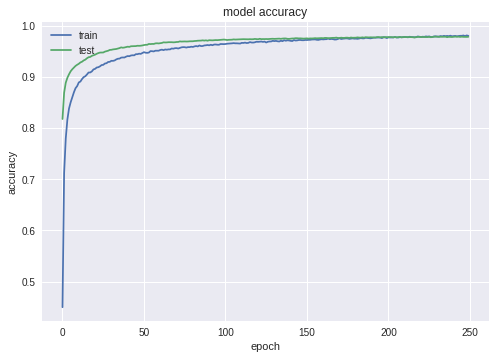

In [43]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

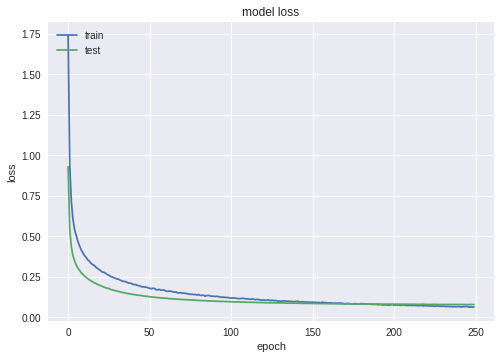

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()